# 07_05: Simulating data

In [240]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [241]:
import random
import faker

In [242]:
fake = faker.Faker()

In [243]:
fake.name()

'Ann King'

In [244]:
fake.address()

'8121 Austin Village\nSouth Alejandrohaven, MH 38465'

In [245]:
fake.date_of_birth()

datetime.date(1959, 1, 3)

In [246]:
fake.city()

'Port Nicholasbury'

In [247]:
fake.state_abbr()

'TX'

In [248]:
music_genres = ['Rock', 'Pop', 'Jazz', 'Hip Hop', 'Country', 'Electronic', 'Blues', 
                'Reggae', 'Metal', 'Folk', 'Soul', 'R&B', 'Punk', 'Indie', 'Alternative']

In [249]:
def artist():
    return {'name': fake.name(),
            'dob': pd.to_datetime(fake.date_of_birth(minimum_age=16, maximum_age=80)), # from Python to pandas date object
            'birthplace': f'{fake.city()} {fake.state_abbr()}',
            'genre': fake.random_element(music_genres)}

In [250]:
artist()

{'name': 'Tonya Haney',
 'dob': Timestamp('2001-05-25 00:00:00'),
 'birthplace': 'Annburgh PR',
 'genre': 'Reggae'}

In [251]:
artists = pd.DataFrame([artist() for i in range(100)])
artists.index.name = 'artist_id'

In [252]:
artists

,name,dob,birthplace,genre
artist_id,,,,
0,Heather Brown,1945-11-23,Carolynberg ID,Rock
1,Shannon Johnson,2007-04-03,Port Ronaldside VA,Punk
2,Nancy Flynn,1972-05-19,Thomasville DC,R&B
3,Jennifer Chung,1981-10-16,North Claire MA,Blues
4,Jacqueline Brown,1970-06-11,West Dana NM,Hip Hop
...,...,...,...,...
95,Ryan Krueger,2003-12-21,Masonton LA,Soul
96,Mr. Michael Mathis MD,1969-02-18,Mooremouth FL,Country
97,Candace Farmer,1969-07-10,Wagnerhaven GA,R&B


In [253]:
def song():
    artist = fake.random_element(artists.index)
    
    return {'title': fake.text(max_nb_chars=20)[:-1], # skip the final period
            'release': pd.to_datetime(fake.past_date(start_date="-2y")), # get dates in the last two years
            'artist_id': artist,
            'genre': artists.loc[artist, 'genre']}

In [254]:
song()

{'title': 'Yes boy along TV',
 'release': Timestamp('2023-06-15 00:00:00'),
 'artist_id': 29,
 'genre': 'Metal'}

In [255]:
song()

{'title': 'Answer send country',
 'release': Timestamp('2024-10-04 00:00:00'),
 'artist_id': 67,
 'genre': 'Country'}

In [256]:
songs = pd.DataFrame([song() for i in range(500)])
songs.index.name = 'song_id'

In [257]:
songs

,title,release,artist_id,genre
song_id,,,,
0,Hot magazine much,2024-04-01,61,R&B
1,Those look film,2023-04-30,20,Alternative
2,Site try involve,2024-08-29,51,Indie
3,Company prevent,2024-08-20,19,Electronic
4,Fight surface unit,2022-11-17,21,Reggae
...,...,...,...,...
495,Rate well field,2023-02-03,89,Pop
496,Return tax weight,2024-04-04,4,Hip Hop
497,Official total,2022-12-02,24,Jazz


In [258]:
songs.loc[0].release

Timestamp('2024-04-01 00:00:00')

In [259]:
duration = np.random.randint(10, 50)

In [260]:
songs.loc[0].release + pd.Timedelta(weeks=duration)

Timestamp('2024-11-25 00:00:00')

In [261]:
t = pd.date_range(start=songs.loc[0].release,
                  end=songs.loc[0].release + pd.Timedelta(weeks=duration),
                  freq='W-MON')[:duration] # handle case where release is on Monday
t

DatetimeIndex(['2024-04-01', '2024-04-08', '2024-04-15', '2024-04-22',
               '2024-04-29', '2024-05-06', '2024-05-13', '2024-05-20',
               '2024-05-27', '2024-06-03', '2024-06-10', '2024-06-17',
               '2024-06-24', '2024-07-01', '2024-07-08', '2024-07-15',
               '2024-07-22', '2024-07-29', '2024-08-05', '2024-08-12',
               '2024-08-19', '2024-08-26', '2024-09-02', '2024-09-09',
               '2024-09-16', '2024-09-23', '2024-09-30', '2024-10-07',
               '2024-10-14', '2024-10-21', '2024-10-28', '2024-11-04',
               '2024-11-11', '2024-11-18'],
              dtype='datetime64[ns]', freq='W-MON')

In [262]:
initial_plays = np.random.randint(500000, 1000000)

In [263]:
cleanplays = initial_plays * np.linspace(1, 1/duration, duration)

In [264]:
noisyplays = cleanplays * np.random.uniform(0.8, 1.2, duration)

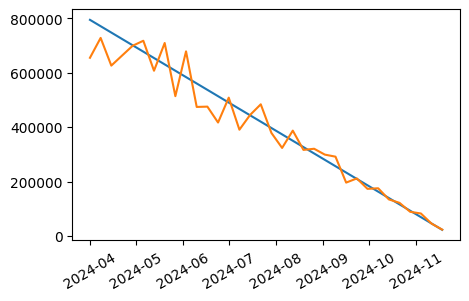

In [265]:
pp.figure(figsize=(5,3))
pp.plot(t, cleanplays)
pp.plot(t, noisyplays)
pp.xticks(rotation=30); # angled tick labels are more readable

In [266]:
def history(song_id):
    duration = np.random.randint(10, 50)

    t = pd.date_range(start=songs.loc[song_id].release,
                      end=songs.loc[song_id].release + pd.Timedelta(weeks=duration),
                      freq='W-MON')[:duration]

    initial_plays = np.random.randint(500000, 1000000)
    plays = initial_plays * np.linspace(1, 0, duration) * np.random.uniform(0.8, 1.2, duration)
    
    return pd.DataFrame({'song_id': song_id, 'plays': plays.astype(int), 'date': t})

In [267]:
history(1).head()

,song_id,plays,date
0,1,935838,2023-05-01
1,1,778292,2023-05-08
2,1,938373,2023-05-15
3,1,906898,2023-05-22
4,1,804744,2023-05-29


In [268]:
histories = pd.concat([history(song_id) for song_id in songs.index], axis=0) \
              .reset_index().rename(columns={'index': 'week'})

In [269]:
histories

,week,song_id,plays,date
0,0,0,508296,2024-04-01
1,1,0,606916,2024-04-08
2,2,0,557973,2024-04-15
3,3,0,460526,2024-04-22
4,4,0,462137,2024-04-29
...,...,...,...,...
14931,37,499,101141,2024-09-23
14932,38,499,81814,2024-09-30
14933,39,499,43892,2024-10-07
14934,40,499,26735,2024-10-14


In [270]:
histories = histories[(histories.date > pd.Timestamp.today() - pd.Timedelta(weeks=52)) &
                      (histories.date <= pd.Timestamp.today())]

In [271]:
histories = histories.sort_values(['date', 'plays'], ascending=[True, False])

In [272]:
topten = histories.groupby('date').head(10).set_index('date')
topten

,week,song_id,plays
date,,,
2023-11-06,0,336,1043402
2023-11-06,0,340,1031103
2023-11-06,0,296,855492
2023-11-06,2,440,850890
2023-11-06,10,116,847032
...,...,...,...
2024-10-28,1,13,909985
2024-10-28,2,188,906758
2024-10-28,1,438,900896


In [273]:
topten.loc['2024-09-09']

,week,song_id,plays
date,,,
2024-09-09,4,36,1047041
2024-09-09,5,207,931074
2024-09-09,0,65,924285
2024-09-09,1,129,913595
2024-09-09,2,3,888234
2024-09-09,0,266,879197
2024-09-09,9,251,858249
2024-09-09,6,309,846575
2024-09-09,1,156,814726


In [274]:
topten['rank'] = topten.groupby('date').plays.rank(ascending=False)

In [275]:
topten

,week,song_id,plays,rank
date,,,,
2023-11-06,0,336,1043402,1.0
2023-11-06,0,340,1031103,2.0
2023-11-06,0,296,855492,3.0
2023-11-06,2,440,850890,4.0
2023-11-06,10,116,847032,5.0
...,...,...,...,...
2024-10-28,1,13,909985,6.0
2024-10-28,2,188,906758,7.0
2024-10-28,1,438,900896,8.0


In [276]:
songs.head()

,title,release,artist_id,genre
song_id,,,,
0,Hot magazine much,2024-04-01,61,R&B
1,Those look film,2023-04-30,20,Alternative
2,Site try involve,2024-08-29,51,Indie
3,Company prevent,2024-08-20,19,Electronic
4,Fight surface unit,2022-11-17,21,Reggae


In [277]:
artists.head()

,name,dob,birthplace,genre
artist_id,,,,
0,Heather Brown,1945-11-23,Carolynberg ID,Rock
1,Shannon Johnson,2007-04-03,Port Ronaldside VA,Punk
2,Nancy Flynn,1972-05-19,Thomasville DC,R&B
3,Jennifer Chung,1981-10-16,North Claire MA,Blues
4,Jacqueline Brown,1970-06-11,West Dana NM,Hip Hop


In [278]:
merged = topten.merge(songs, left_on='song_id', right_index=True) \
               .merge(artists.name, left_on='artist_id', right_index=True)
merged

,week,song_id,plays,rank,title,release,artist_id,genre,name
date,,,,,,,,,
2023-11-06,0,336,1043402,1.0,Dinner film have,2023-11-02,95,Soul,Ryan Krueger
2023-11-06,0,340,1031103,2.0,Nor control attack,2023-11-01,53,Soul,Tammy Norris
2023-11-06,0,296,855492,3.0,Some per military,2023-11-02,15,Hip Hop,Amy Brown DDS
2023-11-06,2,440,850890,4.0,Coach rate beyond,2023-10-21,4,Hip Hop,Jacqueline Brown
2023-11-06,10,116,847032,5.0,Visit focus another,2023-08-22,92,Alternative,Eric Porter
...,...,...,...,...,...,...,...,...,...
2024-10-28,1,13,909985,6.0,Someone interesting,2024-10-18,16,Metal,Tammy Espinoza
2024-10-28,2,188,906758,7.0,Pretty pay PM,2024-10-11,90,Punk,Tracy Leon
2024-10-28,1,438,900896,8.0,Perform room theory,2024-10-17,49,Alternative,Ryan Gibson


In [279]:
first = merged.query('rank == 1').groupby('name').title.count().sort_values(ascending=False).head()
first

name
Tammy Norris       4
Luis Ayala         3
Robert Griffin     3
Stacy Hebert       3
Erika Patterson    2
Name: title, dtype: int64

In [280]:
merged[(merged['rank'] == 1) & (merged['name'] == first.index[0])]

,week,song_id,plays,rank,title,release,artist_id,genre,name
date,,,,,,,,,
2023-11-13,1,340,1133489,1.0,Nor control attack,2023-11-01,53,Soul,Tammy Norris
2023-12-04,4,340,1040993,1.0,Nor control attack,2023-11-01,53,Soul,Tammy Norris
2024-09-23,0,268,1133674,1.0,Whose of small send,2024-09-19,53,Soul,Tammy Norris
2024-10-07,2,268,1106137,1.0,Whose of small send,2024-09-19,53,Soul,Tammy Norris


In [281]:
merged.to_hdf('songtables.h5', key='topten')
artists.to_hdf('songtables.h5', key='artists')
songs.to_hdf('songtables.h5', key='songs')

In [282]:
h5 = pd.HDFStore('songtables.h5')

In [283]:
h5.keys()

['/artists', '/songs', '/topten']

In [284]:
h5['/artists']

,name,dob,birthplace,genre
artist_id,,,,
0,Heather Brown,1945-11-23,Carolynberg ID,Rock
1,Shannon Johnson,2007-04-03,Port Ronaldside VA,Punk
2,Nancy Flynn,1972-05-19,Thomasville DC,R&B
3,Jennifer Chung,1981-10-16,North Claire MA,Blues
4,Jacqueline Brown,1970-06-11,West Dana NM,Hip Hop
...,...,...,...,...
95,Ryan Krueger,2003-12-21,Masonton LA,Soul
96,Mr. Michael Mathis MD,1969-02-18,Mooremouth FL,Country
97,Candace Farmer,1969-07-10,Wagnerhaven GA,R&B
